In [63]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [70]:
import sys
sys.path.append('../../')
import numpy as np
from eckity.algorithms.simple_evolution import SimpleEvolution
from eckity.breeders.simple_breeder import SimpleBreeder
from eckity.creators.ga_creators.bit_string_vector_creator import (
    GABitStringVectorCreator,
)
from eckity.creators.ga_creators.int_vector_creator import GAIntVectorCreator
from eckity.genetic_operators.crossovers.vector_k_point_crossover import (
    VectorKPointsCrossover,
)
from eckity.genetic_operators.mutations.vector_random_mutation import (
    BitStringVectorNFlipMutation,
    IntVectorNPointMutation,
)
from eckity.genetic_operators.selections.tournament_selection import (
    TournamentSelection,
)
from eckity.subpopulation import Subpopulation
from plot_statistics import PlotStatistics

from problems.blackjack.blackjack_evaluator import BlackjackEvaluator
from problems.frozen_lake.frozen_lake_evaluator import FrozenLakeEvaluator, FROZEN_LAKE_STATES
from problems.monster_cliff_walking.monstercliff_evaluator import (
    MonsterCliffWalkingEvaluator,
)

length = FROZEN_LAKE_STATES
creator = GAIntVectorCreator(length=length, bounds=(0, 3))
ind_eval = FrozenLakeEvaluator(total_episodes=3)
mutation = IntVectorNPointMutation(probability=0.3, n=length // 10)
generations = 50



In [71]:
evo = SimpleEvolution(
        Subpopulation(
            creators=creator,
            population_size=100,
            evaluator=ind_eval,
            higher_is_better=True,
            elitism_rate=0.0,
            operators_sequence=[
                VectorKPointsCrossover(probability=0.7, k=2),
                mutation,
            ],
            selection_methods=[
                # (selection method, selection probability) tuple
                (
                    TournamentSelection(
                        tournament_size=4, higher_is_better=True
                    ),
                    1,
                )
            ],
        ),
        breeder=SimpleBreeder(),
        max_generation=generations,
        # executor="process",
        max_workers=1,
        statistics=PlotStatistics(),

    )
evo.evolve()

mean_fitnesses = [0.003333333333333333, 0.0, 0.003333333333333333, 0.0, 0.003333333333333333, 0.003333333333333333, 0.0, 0.003333333333333333, 0.003333333333333333, 0.0, 0.0, 0.0, 0.01, 0.006666666666666666, 0.016666666666666666, 0.02, 0.013333333333333332, 0.02, 0.006666666666666666, 0.016666666666666666, 0.02, 0.026666666666666665, 0.019999999999999997, 0.02333333333333333, 0.039999999999999994, 0.04, 0.05999999999999999, 0.04, 0.07, 0.06999999999999999, 0.10333333333333332, 0.08333333333333334, 0.11, 0.11333333333333334, 0.12666666666666665, 0.12666666666666668, 0.15666666666666665, 0.19333333333333333, 0.12666666666666665, 0.15, 0.21666666666666667, 0.2633333333333333, 0.2766666666666666, 0.2333333333333333, 0.28, 0.2833333333333333, 0.3066666666666667, 0.31666666666666665, 0.3600000000000001, 0.38]
median_fitnesses = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

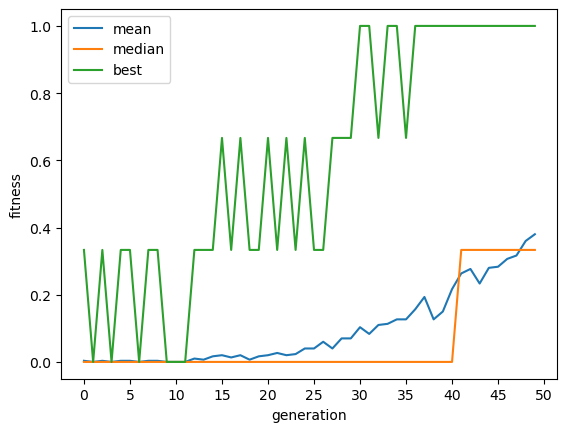

In [72]:
statistics = evo.statistics[0]
statistics.plot_statistics()